## PROJ25: Machine Learning Project of Student Dropout Success dataset

text...

*1. DATA EXPLORATION*

***2. DATA PREPROCESSING***

1. DATA EXPLORATION
2. DATA PREPROCESSING
3. MODEL DEVELOPMENT
4. MODEL EVALUATION
5. PROJECT CONCLUSIONS

In [48]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import joblib

from collections import Counter

from sklearn.metrics import * 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

In [49]:
import warnings
warnings.filterwarnings("ignore", message='Glyph 9?')

### 1. DATA EXPLORATION (EDA)

In [50]:
# df = pd.read_csv('/Users/nima/Downloads/PROJ25/gruppuppgift/02_dataset/student_dropout_success/data.csv', sep=';')
df = pd.read_csv('./data.csv', sep=';') # Change path to be relative and not dependent on machine

In [51]:
# Info about the dataset
df.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1              

In [52]:
# Showing all the features in the dataset
display(df.keys())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [53]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [54]:
# Number of rows and columns in the dataset
df.shape

(4424, 37)

In [55]:
# Datatypes in the dataset
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [56]:
# Checking unique values in the Target attribute and the distribution of the unique values
target_types = Counter(df['Target'])
print(df['Target'].unique())
print(target_types)

['Dropout' 'Graduate' 'Enrolled']
Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


In [57]:
# Checking if there is any missing values in the dataset
pd.isnull(df).sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### 2. DATA PREPROCESSING

The decision was made to drop 'Enrolled' in the Target attribute, since we are only interested in predicting if a student is going to dropout or graduate. The main purpose of the predictions is to find and help students that are at risk of dropping out.

In [58]:
# Creating dataset without 'Enrolled'
df2 = df.copy(deep=True)
df2 = df2[df2.Target != 'Enrolled']
print(np.unique(df2['Target'], return_counts=True))

(array(['Dropout', 'Graduate'], dtype=object), array([1421, 2209], dtype=int64))


In [59]:
# Shape of the dataset after 'Enrolled' has been dropped
df2.shape

(3630, 37)

In [60]:
# Transforming Target to numerical values, Dropout=0, Graduate=1
dft = df2.copy(deep=True)
le = LabelEncoder()
label = le.fit_transform(dft['Target'])
dft.drop("Target", axis=1, inplace=True)
dft["Target"] = label
print(np.unique(dft['Target'], return_counts=True))

(array([0, 1]), array([1421, 2209], dtype=int64))


In [61]:
# Correlation between the target and the features in the dataset, displaying top 15.
pd.DataFrame(dft.corr()[dft.columns[-1:]]).sort_values(by=['Target'], ascending=False).head(15)

,Target
Target,1.000000
Curricular units 2nd sem (approved),0.653995
Curricular units 2nd sem (grade),0.605350
Curricular units 1st sem (approved),0.554881
Curricular units 1st sem (grade),0.519927
Tuition fees up to date,0.442138
Scholarship holder,0.313018
Curricular units 2nd sem (enrolled),0.182897
Curricular units 1st sem (enrolled),0.161074
Admission grade,0.128058


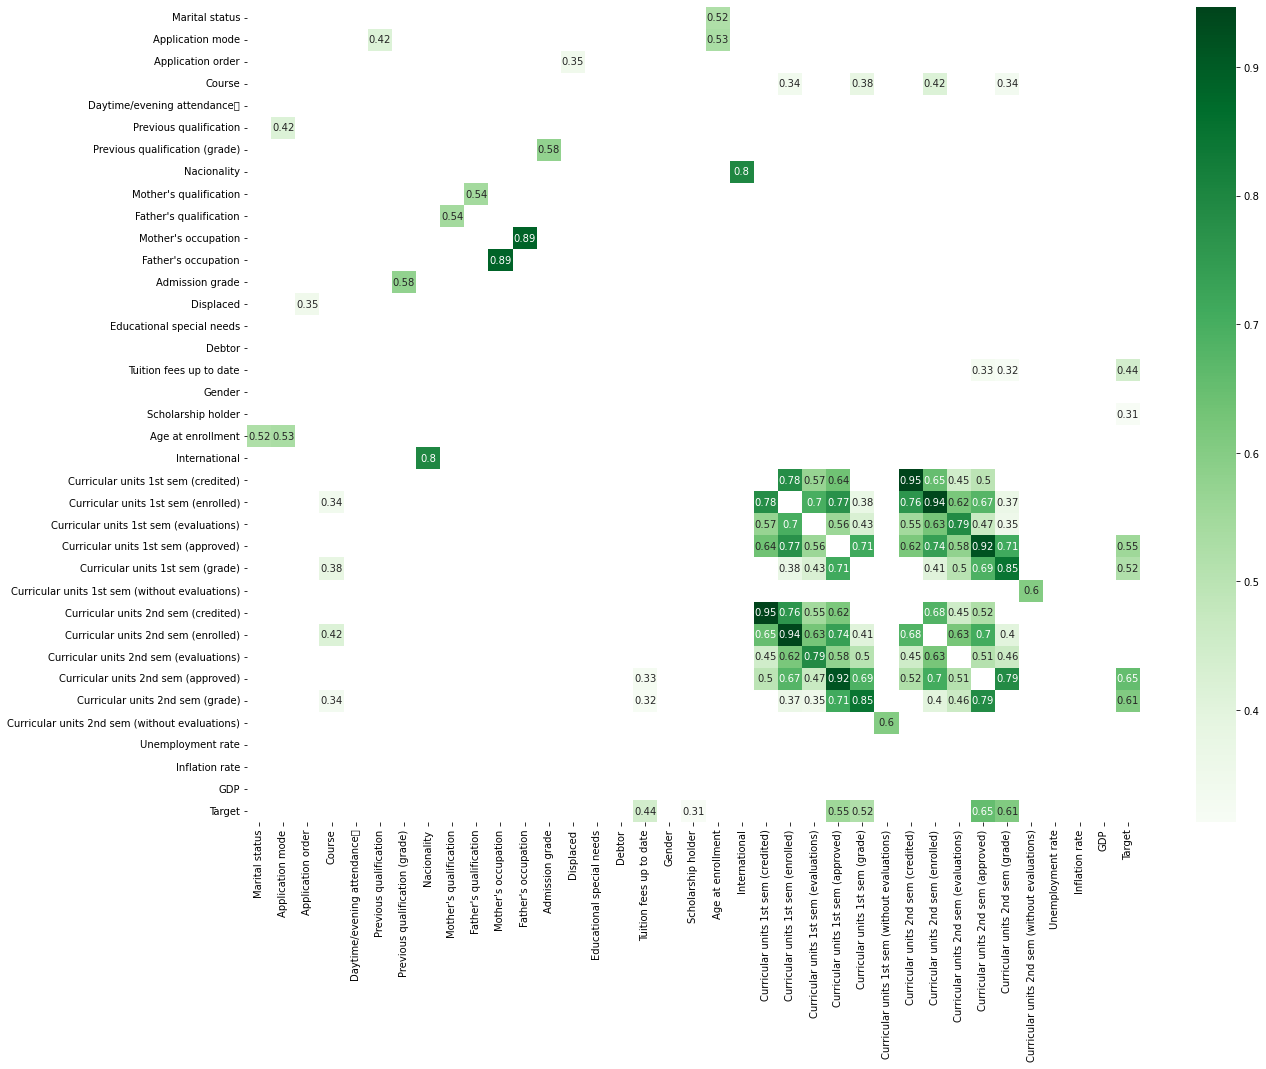

In [62]:
# Correlation Matrix over the dataset
cmatrix = dft.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cmatrix[((cmatrix >= .3) | (cmatrix <= -.6)) & (cmatrix !=1.000)], annot=True, cmap="Greens")
plt.show()

In [63]:
# Creating X, dataset without labels
X = dft.drop(['Target'], axis=1)

In [64]:
# Creating y, the label dataset
y = dft['Target']

In [65]:
# Splitting the data into a training, test and validation dataset
X_train, X_te_va, y_train, y_te_va = train_test_split(X, y, test_size = 0.3, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_te_va, y_te_va, test_size = 0.5, stratify=y_te_va)

In [66]:
# Checking the distribution and parts in the split datasets
print('Training dataset part:', "{:.2%}".format((y_train.count()/y.count())))
print('Test dataset part:', "{:.2%}".format((y_test.count()/y.count())))
print('Validation dataset part:', "{:.2%}".format((y_val.count()/y.count())))
print()
print('Distribution in Training dataset: Graduate:', "{:.2%}".format((np.count_nonzero(y_train)/y_train.count())),
     '; Dropout:',"{:.2%}".format(((y_train.count() - np.count_nonzero(y_train))/y_train.count())))
print('Distribution in Test dataset: Graduate:', "{:.2%}".format((np.count_nonzero(y_test)/y_test.count())),
     '; Dropout:',"{:.2%}".format(((y_test.count() - np.count_nonzero(y_test))/y_test.count())))
print('Distribution in Validation dataset: Graduate:', "{:.2%}".format((np.count_nonzero(y_val)/y_val.count())),
     '; Dropout:',"{:.2%}".format(((y_val.count() - np.count_nonzero(y_val))/y_val.count())))
print()
print('Info training dataset target:', np.unique(y_train, return_counts=True))
print('Info test dataset target:', np.unique(y_test, return_counts=True))
print('Info validation dataset target:', np.unique(y_val, return_counts=True))

Training dataset part: 70.00%
Test dataset part: 14.99%
Validation dataset part: 15.01%

Distribution in Training dataset: Graduate: 60.84% ; Dropout: 39.16%
Distribution in Test dataset: Graduate: 60.85% ; Dropout: 39.15%
Distribution in Validation dataset: Graduate: 60.92% ; Dropout: 39.08%

Info training dataset target: (array([0, 1]), array([ 995, 1546], dtype=int64))
Info test dataset target: (array([0, 1]), array([213, 331], dtype=int64))
Info validation dataset target: (array([0, 1]), array([213, 332], dtype=int64))


In [67]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training set
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Transform the testing and validation sets using the fitted scaler
X_test_scaled = scaler.transform(X_test.astype(np.float64))
X_val_scaled = scaler.transform(X_val.astype(np.float64))


In [68]:
from IPython.display import display_html

stat_sum = X_train.agg(['median', 'min', 'max', 'std'])
X_train_sc = pd.DataFrame(X_train_scaled)
stat_sum_sc = X_train_sc.agg(['median', 'min', 'max', 'std'])
df1stat = stat_sum.transpose()
df2stat = stat_sum_sc.transpose()

df1styler = df1stat.style.set_table_attributes("style='display:inline'").set_caption('Statistics X_train')
df2styler = df2stat.style.hide(axis='index').set_table_attributes("style='display:inline'").set_caption('Statistics X_train_scaled')
display_html(df1styler._repr_html_() + df2styler._repr_html_(), raw=True)

,median,min,max,std
Marital status,1.000000,1.000000,6.000000,0.597741
Application mode,17.000000,1.000000,53.000000,17.291884
Application order,1.000000,0.000000,6.000000,1.353985
Course,9238.000000,33.000000,9991.000000,2054.702272
Daytime/evening attendance,1.000000,0.000000,1.000000,0.315626
Previous qualification,1.000000,1.000000,43.000000,9.842087
Previous qualification (grade),133.100000,95.000000,188.000000,13.313171
Nacionality,1.000000,1.000000,105.000000,6.988713
Mother's qualification,19.000000,1.000000,44.000000,15.604421
Father's qualification,19.000000,1.000000,44.000000,15.258623


### 3. MODEL DEVELOPMENT

##### • Training and choosing Models
Fifteen different models was trained on the dataset. This code has been removed from the notebook since it's redundant.

Out of these fifteen models was the five with most potential chosen for further investigation. A summary was done over the performance of the five models, also looking at the confusion matrix for the different models to see the difference in predictions between the models. The conclusion is that some are better at predicting 'Dropout' and others at predicting 'Graduate'. But there are no noteworthy differences between them.
##### • K-fold Cross Validation
K-fold Cross Validation was done on the chosen five models to check for discrepancies.
##### • Hyperparameter Tuning
Hyperparameter tuning was performed on these five models, but the outcome did however not show any siginificant improvements compared to the models default settings for the hyperparameters. Therefor the choice was made to use the default settings. This code has been removed from the notebook since it's redundant.
##### • Balancing dataset
Since the dataset was slighlty unbalanced a test was done with balancing the training dataset with the Undersampling and the Oversampling technique in the imblearn library. The purpose was to see if the results could be improved further, the only model that improved slighlty in accuracy was the Gradient Boosting Classifier, the other models gave no improvements. The decision was made not to balance the training dataset. This code has been removed from the notebook since it's redundant.
##### • Dropping features
As a final test several features was dropped from the dataset to see if this could improve the prediction results. 17 features was dropped and was chosen from those that had the least correlation with the Target attribute. Training the models on the dataset with dropped features had no significane on the result at all. This code has been removed from the notebook since it's redundant. 
##### • Ensemble method
Finally was different combinations of the five models used tested in an ensemble method, VotingClassifier. This method gave a more stable outcome on the prediction result. The most satisfactory result with VotingClassifier was with Logistic Regression, Random Forest Classifier, Support Vector Classifier and Gradient Boosting Classifier combined together. This combination was chosen as the final model and will be evaulated in the next step with the untouched validation dataset.

In [69]:
# Importing models used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import KFold

In [70]:
# Train models
# Training the models and displaying the result
# Add any classifier that you want to train your model with into below dictionary.
# Cross-Validation not included for these variables

clf_dict = {
       'Logisitic Regression': LogisticRegression(),
       'Random Forest Classifier': RandomForestClassifier(),
       'Support Vector Classifier': SVC(),
       'Gradient Boosting Classifier': GradientBoostingClassifier(),
       'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

estimators = list(zip(list(map(lambda x: ''.join([c for c in x if c.isupper()]).lower(), list(clf_dict.keys()))), list(clf_dict.values())))

estimator_order = ''.join(list(map(lambda x: f'{x.upper()}, ', list(zip(*estimators[:-1]))[0]))) + estimators[-1][0].upper()

clf_tuple = tuple(map(lambda x: x.upper(), list(zip(*estimators))[0]))

In [71]:
def train_models_multiple_clf(clf):
    f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
    target_list = df2['Target'].unique()
    result = pd.DataFrame(columns = ['Train Accuracy','Validate Accuracy','Precision', 'Recall']) 

    for i, (mdl, clf) in enumerate(clf.items()):
        y_pred_val = clf.fit(X_train_scaled, y_train).predict(X_val_scaled)
        y_pred_train = clf.predict(X_train_scaled)
        acctrain = round(accuracy_score(y_train, y_pred_train), 4)
        accval = round(accuracy_score(y_val, y_pred_val), 4)
        prec = round(precision_score(y_val, y_pred_val, average='weighted'), 4)
        rec = round(recall_score(y_val, y_pred_val, average='weighted'), 4)
        new_row = pd.DataFrame({'Train Accuracy':acctrain, 'Validate Accuracy':accval, 'Precision':prec, 'Recall':rec},
                            index=[mdl])
        result = pd.concat([result, new_row], axis=0)
        cm = ConfusionMatrixDisplay.from_estimator(clf,
                                                X_val_scaled,
                                                y_val,
                                                display_labels=target_list,
                                                ax=axes[i],
                                                colorbar=False)
        cm.plot(ax=axes[i], xticks_rotation=45, cmap=plt.cm.Blues,values_format='g')
        cm.ax_.set_title(mdl)
        cm.im_.colorbar.remove()
        cm.ax_.set_xlabel('')
        if i!=0:
            cm.ax_.set_ylabel('')

    f.text(0.4, 0.1, 'Predicted label', ha='left')
    plt.subplots_adjust(wspace=0.40, hspace=0.1)

    f.colorbar(cm.im_, ax=axes)
    plt.show()

    #result.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))
    display(result.style.format('{:.2%}'))

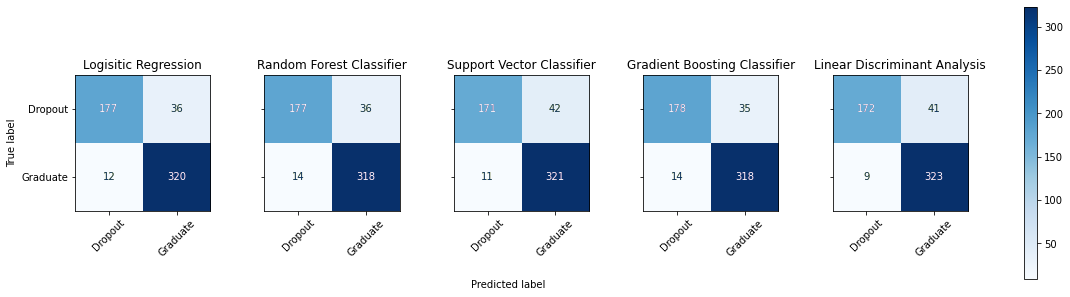

,Train Accuracy,Validate Accuracy,Precision,Recall
Logisitic Regression,91.97%,91.19%,91.36%,91.19%
Random Forest Classifier,100.00%,90.83%,90.94%,90.83%
Support Vector Classifier,93.66%,90.28%,90.59%,90.28%
Gradient Boosting Classifier,94.33%,91.01%,91.11%,91.01%
Linear Discriminant Analysis,90.71%,90.83%,91.20%,90.83%


In [72]:
# Training the models and displaying the result

train_models_multiple_clf(clf_dict)

In [73]:
# # Training the models and displaying the result
# clf = {'Logistic Regression': LogisticRegression(),
#        'Random Forest Classifier': RandomForestClassifier(),
#        'Support Vector Classifier': SVC(),
#        'Gradient Boosting Classifier': GradientBoostingClassifier(),
#        'Linear Discriminant Analysis': LinearDiscriminantAnalysis()}

# f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
# target_list = df2['Target'].unique()
# result = pd.DataFrame(columns = ['Train Accuracy','Test Accuracy','Precision', 'Recall']) 

# for i, (mdl, clf) in enumerate(clf.items()):
#     y_pred_test = clf.fit(X_train_scaled, y_train).predict(X_test_scaled)
#     y_pred_train = clf.predict(X_train_scaled)
#     acctrain = round(accuracy_score(y_train, y_pred_train), 4)
#     acctest = round(accuracy_score(y_test, y_pred_test), 4)
#     prec = round(precision_score(y_test, y_pred_test, average='weighted'), 4)
#     rec = round(recall_score(y_test, y_pred_test, average='weighted'), 4)
#     new_row = pd.DataFrame({'Train Accuracy':acctrain, 'Test Accuracy':acctest, 'Precision':prec, 'Recall':rec},
#                            index=[mdl])
#     result = pd.concat([result, new_row], axis=0)
#     cm = ConfusionMatrixDisplay.from_estimator(clf,
#                                                X_test_scaled,
#                                                y_test,
#                                                display_labels=target_list,
#                                                ax=axes[i],
#                                                colorbar=False)
#     cm.plot(ax=axes[i], xticks_rotation=45, cmap=plt.cm.Blues,values_format='g')
#     cm.ax_.set_title(mdl)
#     cm.im_.colorbar.remove()
#     cm.ax_.set_xlabel('')
#     if i!=0:
#         cm.ax_.set_ylabel('')

# f.text(0.4, 0.1, 'Predicted label', ha='left')
# plt.subplots_adjust(wspace=0.40, hspace=0.1)

# f.colorbar(cm.im_, ax=axes)
# plt.show()

# #result.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))
# display(result.style.format('{:.2%}'))

In [74]:
# OBS NY KOD SOM SKA LÄGGAS IN!!!!!
# Hyperparameter Tuning with RandomizedSearchCV
# clf = {'Logistic Regression': LogisticRegression(),
#        'Random Forest Classifier': RandomForestClassifier(),
#        'Support Vector Classifier': SVC(),
#        'Gradient Boosting Classifier': GradientBoostingClassifier(),
#        'Linear Discriminant Analysis': LinearDiscriminantAnalysis()}

params_lr = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'solver':['lbfgs', 'saga', 'sag', 'liblinear'],
             'max_iter':[1000]}

params_rf = {'bootstrap': [True, False],
             'max_depth': [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt', 'log2', None],
             'min_samples_leaf': [1, 2, 4, 10, 30, 60],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [10, 50, 100, 200, 500, 1000, 1500, 2000]}

params_svc = {'kernel':['linear', 'poly', 'rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':['scale', 'auto', 0.1, 1, 10, 100],
              'coef0':[0, 1]}


params_gbc = {'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500],
              'max_leaf_nodes': [2, 5, 10, 20, 50, 100],
              'learning_rate': (0.01, 1)}

params_lda = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto', 0.1, 0.2, 0.3, 0.4, 0.5]}
# lda has no hyperparameters that you can set
# found hyperparameters!

hyp_par_list = (params_lr, params_rf, params_svc, params_gbc, params_lda)

res_hyp_par = pd.DataFrame(columns = ['Accuracy', 'Optimized hyperparameters'])
pd.set_option('display.max_colwidth', None)

for i, (mdl, clf) in enumerate(clf_dict.items()):
    name = mdl.replace(' ', '_') + '_RandomizedSearchCV.joblib'

    racv = RandomizedSearchCV(clf, hyp_par_list[i], n_jobs=-1, cv=5)
    racv.fit(X_train_scaled, y_train)
    acc_hp = racv.best_score_
    opt_hp = str(racv.best_params_)
    new_row = pd.DataFrame({'Accuracy':acc_hp, 'Optimized hyperparameters':opt_hp},
                           index=[mdl])
    res_hyp_par = pd.concat([res_hyp_par, new_row], axis=0)
    joblib.dump(racv, name)

display(res_hyp_par)

,Accuracy,Optimized hyperparameters
Logisitic Regression,0.913424,"{'solver': 'lbfgs', 'max_iter': 1000, 'C': 100}"
Random Forest Classifier,0.906346,"{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}"
Support Vector Classifier,0.90634,"{'kernel': 'linear', 'gamma': 1, 'coef0': 0, 'C': 0.01}"
Gradient Boosting Classifier,0.907917,"{'n_estimators': 500, 'max_leaf_nodes': 5, 'learning_rate': 0.01}"
Linear Discriminant Analysis,0.909491,"{'solver': 'eigen', 'shrinkage': 'auto'}"


In [75]:
# OBS NY KOD SOM SKA LÄGGAS IN!!!!!
# OBS!!! köra Cross val predict, som bygger på den data som den inte sett
# Cross validation through cross_val_predict
# temp_clf = {'Logistic Regression': LogisticRegression(),
#        'Random Forest Classifier': RandomForestClassifier(),
#        'Support Vector Classifier': SVC(),
#        'Gradient Boosting Classifier': GradientBoostingClassifier(),
#        'Linear Discriminant Analysis': LinearDiscriminantAnalysis()}

res_hyp_par = pd.DataFrame(columns = ['Accuracy', 'Optimized hyperparameters'])

for i, (mdl, clf) in enumerate(clf_dict.items()):
    y_pred_cv = cross_val_predict(clf, X_train_scaled, y_train, n_jobs=-1, cv=5)
    print(mdl, accuracy_score(y_train, y_pred_cv))

Logisitic Regression 0.9134199134199135
Random Forest Classifier 0.9067296340023613
Support Vector Classifier 0.9027941755214482
Gradient Boosting Classifier 0.9098780007870917
Linear Discriminant Analysis 0.9047619047619048


In [76]:
#OBS!!! NY KOD SOM SKA LÄGGAS IN!!!

# Importing the ensemble method VotingClassifier
from sklearn.ensemble import VotingClassifier
from itertools import combinations

# lr = LogisticRegression()
# rf = RandomForestClassifier()
# svc = SVC()
# gbc = GradientBoostingClassifier()
# lda = LinearDiscriminantAnalysis()

summa = pd.DataFrame(columns = ['Train Accuracy','Validate Accuracy']) 

# Already defined in the beginning
# mdl_list = [('lr', lr), ('rf', rf), ('svc', svc), ('gbc', gbc), ('lda', lda)]
# mdl_list2 = ('LR', 'RF', 'SVC', 'GBC', 'LDA')


comb_list = list(combinations(estimators, 4))
comb_list2 = list(combinations(clf_tuple, 4))
comb_list.insert(0, estimators)
comb_list2.insert(0, clf_tuple) 

for rakna, clfs in enumerate(comb_list):
    mdls = comb_list2[rakna]
    name = '_'.join(mdls) + '_VotingClassifier.joblib'

    ensemble = VotingClassifier(estimators=clfs, voting='hard', n_jobs=-1)
    ensemble.fit(X_train_scaled, y_train)
    acc_tr = ensemble.score(X_train_scaled, y_train)
    acc_te = ensemble.score(X_val_scaled, y_val)
    new_row = pd.DataFrame({'Train Accuracy':acc_tr, 'Validate Accuracy':acc_te}, index=[mdls])
    summa = pd.concat([summa, new_row], axis=0)
    joblib.dump(ensemble, name)

display(summa.style.format("{:.2%}"))

,Train Accuracy,Validate Accuracy
"('LR', 'RFC', 'SVC', 'GBC', 'LDA')",94.10%,90.64%
"('LR', 'RFC', 'SVC', 'GBC')",95.08%,91.01%
"('LR', 'RFC', 'SVC', 'LDA')",93.86%,91.56%
"('LR', 'RFC', 'GBC', 'LDA')",94.25%,91.56%
"('LR', 'SVC', 'GBC', 'LDA')",92.96%,91.01%
"('RFC', 'SVC', 'GBC', 'LDA')",95.12%,91.56%


In [77]:
# Define the number of folds
k = 5

# Define the K-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation on each model and compute accuracy scores
for clf_name, clf in clf_dict.items():
    accuracies = []
    for train_index, test_index in kf.split(X_train):
        X_fold_train, X_fold_test = X_train_scaled[train_index], X_train_scaled[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        clf.fit(X_fold_train, y_fold_train)
        y_pred = clf.predict(X_fold_test)
        accuracy = accuracy_score(y_fold_test, y_pred)
        accuracies.append(accuracy)
    mean_accuracy = np.sum(accuracies) / k
    print(clf_name, 'accuracy:', mean_accuracy)



Logisitic Regression accuracy: 0.9146048296025866
Random Forest Classifier accuracy: 0.9039810961743731
Support Vector Classifier accuracy: 0.9020102718005043
Gradient Boosting Classifier accuracy: 0.9067400956019986
Linear Discriminant Analysis accuracy: 0.906340206982968


In [78]:
# Importing the ensemble method VotingClassifier
from sklearn.ensemble import VotingClassifier

#('lda', LinearDiscriminantAnalysis())

# Create our ensemble of models with VotingClassifier
ensemble = VotingClassifier(estimators=estimators,
                            voting='hard',
                            n_jobs=-1)

# Fit model to the training dataset
ensemble.fit(X_train_scaled, y_train)

# Test our model on the test dataset
acc_tr = ensemble.score(X_train_scaled, y_train)
acc_te = ensemble.score(X_val_scaled, y_val)

summary = pd.DataFrame({'Train Accuracy':[acc_tr], 'Validate Accuracy':[acc_te]},
                   index=[f'Voting Classifier ({estimator_order})'])
display(summary.style.format("{:.2%}"))

,Train Accuracy,Validate Accuracy
"Voting Classifier (LR, RFC, SVC, GBC, LDA)",94.10%,91.01%


<a id="change-bnb-fit"></a>

### 4. MODEL EVALUATION

lite text.....

In [79]:
# # Testing our model on the untouched validation dataset
# X_val_scaled = StandardScaler().fit_transform(X_val.astype(np.float64))

# from sklearn.ensemble import VotingClassifier

# #create our voting classifier
# ensemble = VotingClassifier(estimators=[('lr', LogisticRegression()),
#                                         ('gbc', GradientBoostingClassifier()),
#                                         ('rf', RandomForestClassifier()),
#                                         ('svc', SVC())],
#                             voting='hard',
#                             n_jobs=-1)

# #fit model to training data
# ensemble.fit(X_train_scaled, y_train)

# #test our model on the validation data
# acc_val = ensemble.score(X_val_scaled, y_val)
# sum = pd.DataFrame({'Validation Accuracy':[acc_val]},
#                    index=['Voting Classifier (LR, RF, GBC, SVC)'])
# display(sum.style.format("{:.2%}"))

In [80]:
# Testing our model on the untouched test dataset
# X_test_scaled = StandardScaler().fit_transform(X_test.astype(np.float64))

from sklearn.ensemble import VotingClassifier

#create our voting classifier
ensemb_final = VotingClassifier(estimators=comb_list[1],
                            voting='hard',
                            n_jobs=-1)

#fit model to training data
ensemb_final.fit(X_train_scaled, y_train)

#test our model on the validation data
acc_test = ensemb_final.score(X_test_scaled, y_test)

joblib.dump(ensemb_final, 'ensemb_final.joblib')

summary = pd.DataFrame({'Test Accuracy':[acc_test]},
                   index=[comb_list2[1]])
display(summary.style.format("{:.2%}"))



,Test Accuracy
"('LR', 'RFC', 'SVC', 'GBC')",92.65%


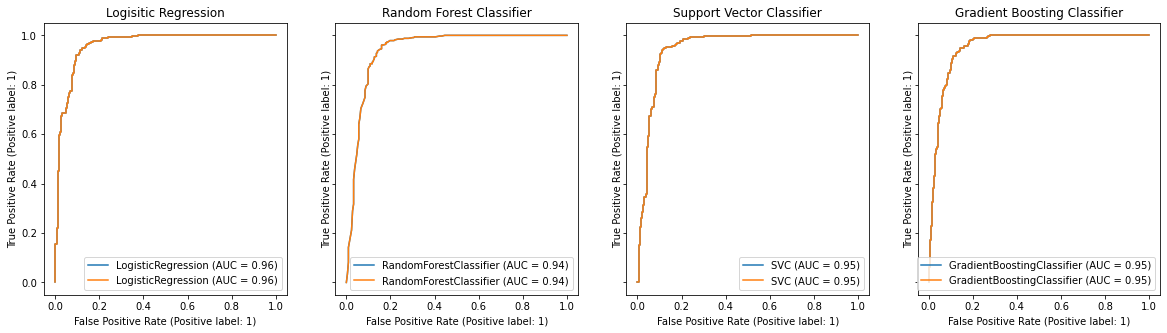

In [81]:
# OBS NY KOD SOM SKA LÄGGAS IN!!!!!

# ROC Curve comparison
clf = {'Logistic Regression': LogisticRegression(),
       'Random Forest Classifier': RandomForestClassifier(),
       'Support Vector Classifier': SVC(),
       'Gradient Boosting Classifier': GradientBoostingClassifier()}

# lda has no ROC curve

temp_clf = {key: value for key, value in clf_dict.items() if str(value) != 'LinearDiscriminantAnalysis()'}

f, axes = plt.subplots(1, len(temp_clf), figsize=(20, 5), sharey='row')

for i, (mdl, clf) in enumerate(clf_dict.items()):
    if (str(clf) != 'LinearDiscriminantAnalysis()'):
        est = clf.fit(X_train_scaled, y_train)
        rc = RocCurveDisplay.from_estimator(est, X_test_scaled, y_test, ax=axes[i])
        rc.plot(ax=axes[i])
        rc.ax_.set_title(mdl)

plt.show()

In [82]:
def add_to_axis(ax, ax2, X_train, X_train_scaled, y_train, clf, labelsize, titlesize, limit):
    for i, value in enumerate(clf):
        if str(clf[value]) == str(SVC()):
            classifier = SVC(kernel="linear")
        else:
            classifier = clf[value]
            
        classifier.fit(X_train_scaled, y_train)
        try:
            imp = (pd.DataFrame(data={'attr': X_train.columns,'im': classifier.coef_[0]})).sort_values(by='im')
            imp2 = (pd.DataFrame(data={'attr': X_train.columns,'im': classifier.coef_[0]})).sort_values(by='im').tail(limit)
        except AttributeError:
            imp = (pd.DataFrame(data={'attr': X_train.columns,'im': classifier.feature_importances_})).sort_values(by='im')
            imp2 = (pd.DataFrame(data={'attr': X_train.columns,'im': classifier.feature_importances_})).sort_values(by='im').tail(limit)

        ax2[math.floor(i/2), i%2].barh(imp2['attr'], imp2['im'], align='center', color=(0.2, 0.6, 0.4, 0.4))
        ax2[math.floor(i/2), i%2].set_title(f'{value}, feature importance', size=titlesize)
        ax2[math.floor(i/2), i%2].tick_params(axis='both', which='major', labelsize=labelsize)

        ax[math.floor(i/2), i%2].barh(imp['attr'], imp['im'], align='center', color=(0.2, 0.6, 0.4, 0.4))
        ax[math.floor(i/2), i%2].set_title(f'{value}, feature importance', size=titlesize)
        ax[math.floor(i/2), i%2].tick_params(axis='both', which='major', labelsize=labelsize)


def models_important_features(X_train, X_train_scaled, y_train, clf, width=10, height=8, labelsize=7, titlesize=9, limit=15):

    fig1, ax1 = plt.subplots(math.ceil(len(clf.keys())/2), 2, figsize=(width,math.ceil(len(clf.keys())/2)*height), tight_layout = True) 
    fig2, ax2 = plt.subplots(math.ceil(len(clf.keys())/2), 2, figsize=(width,math.ceil(len(clf.keys())/2)*height), tight_layout = True) 

    add_to_axis(ax1, ax2, X_train, X_train_scaled, y_train, clf, labelsize, titlesize, limit)


    fig1.suptitle("\n\n\n".join(["Important Features per classifier"]) + '\n\n\n', y=0.98, fontsize=titlesize*2 )
    fig2.suptitle("\n\n\n".join([f"Top {limit} important Features per classifier"]) + '\n\n\n', y=0.98, fontsize=titlesize*2)

    plt.show()

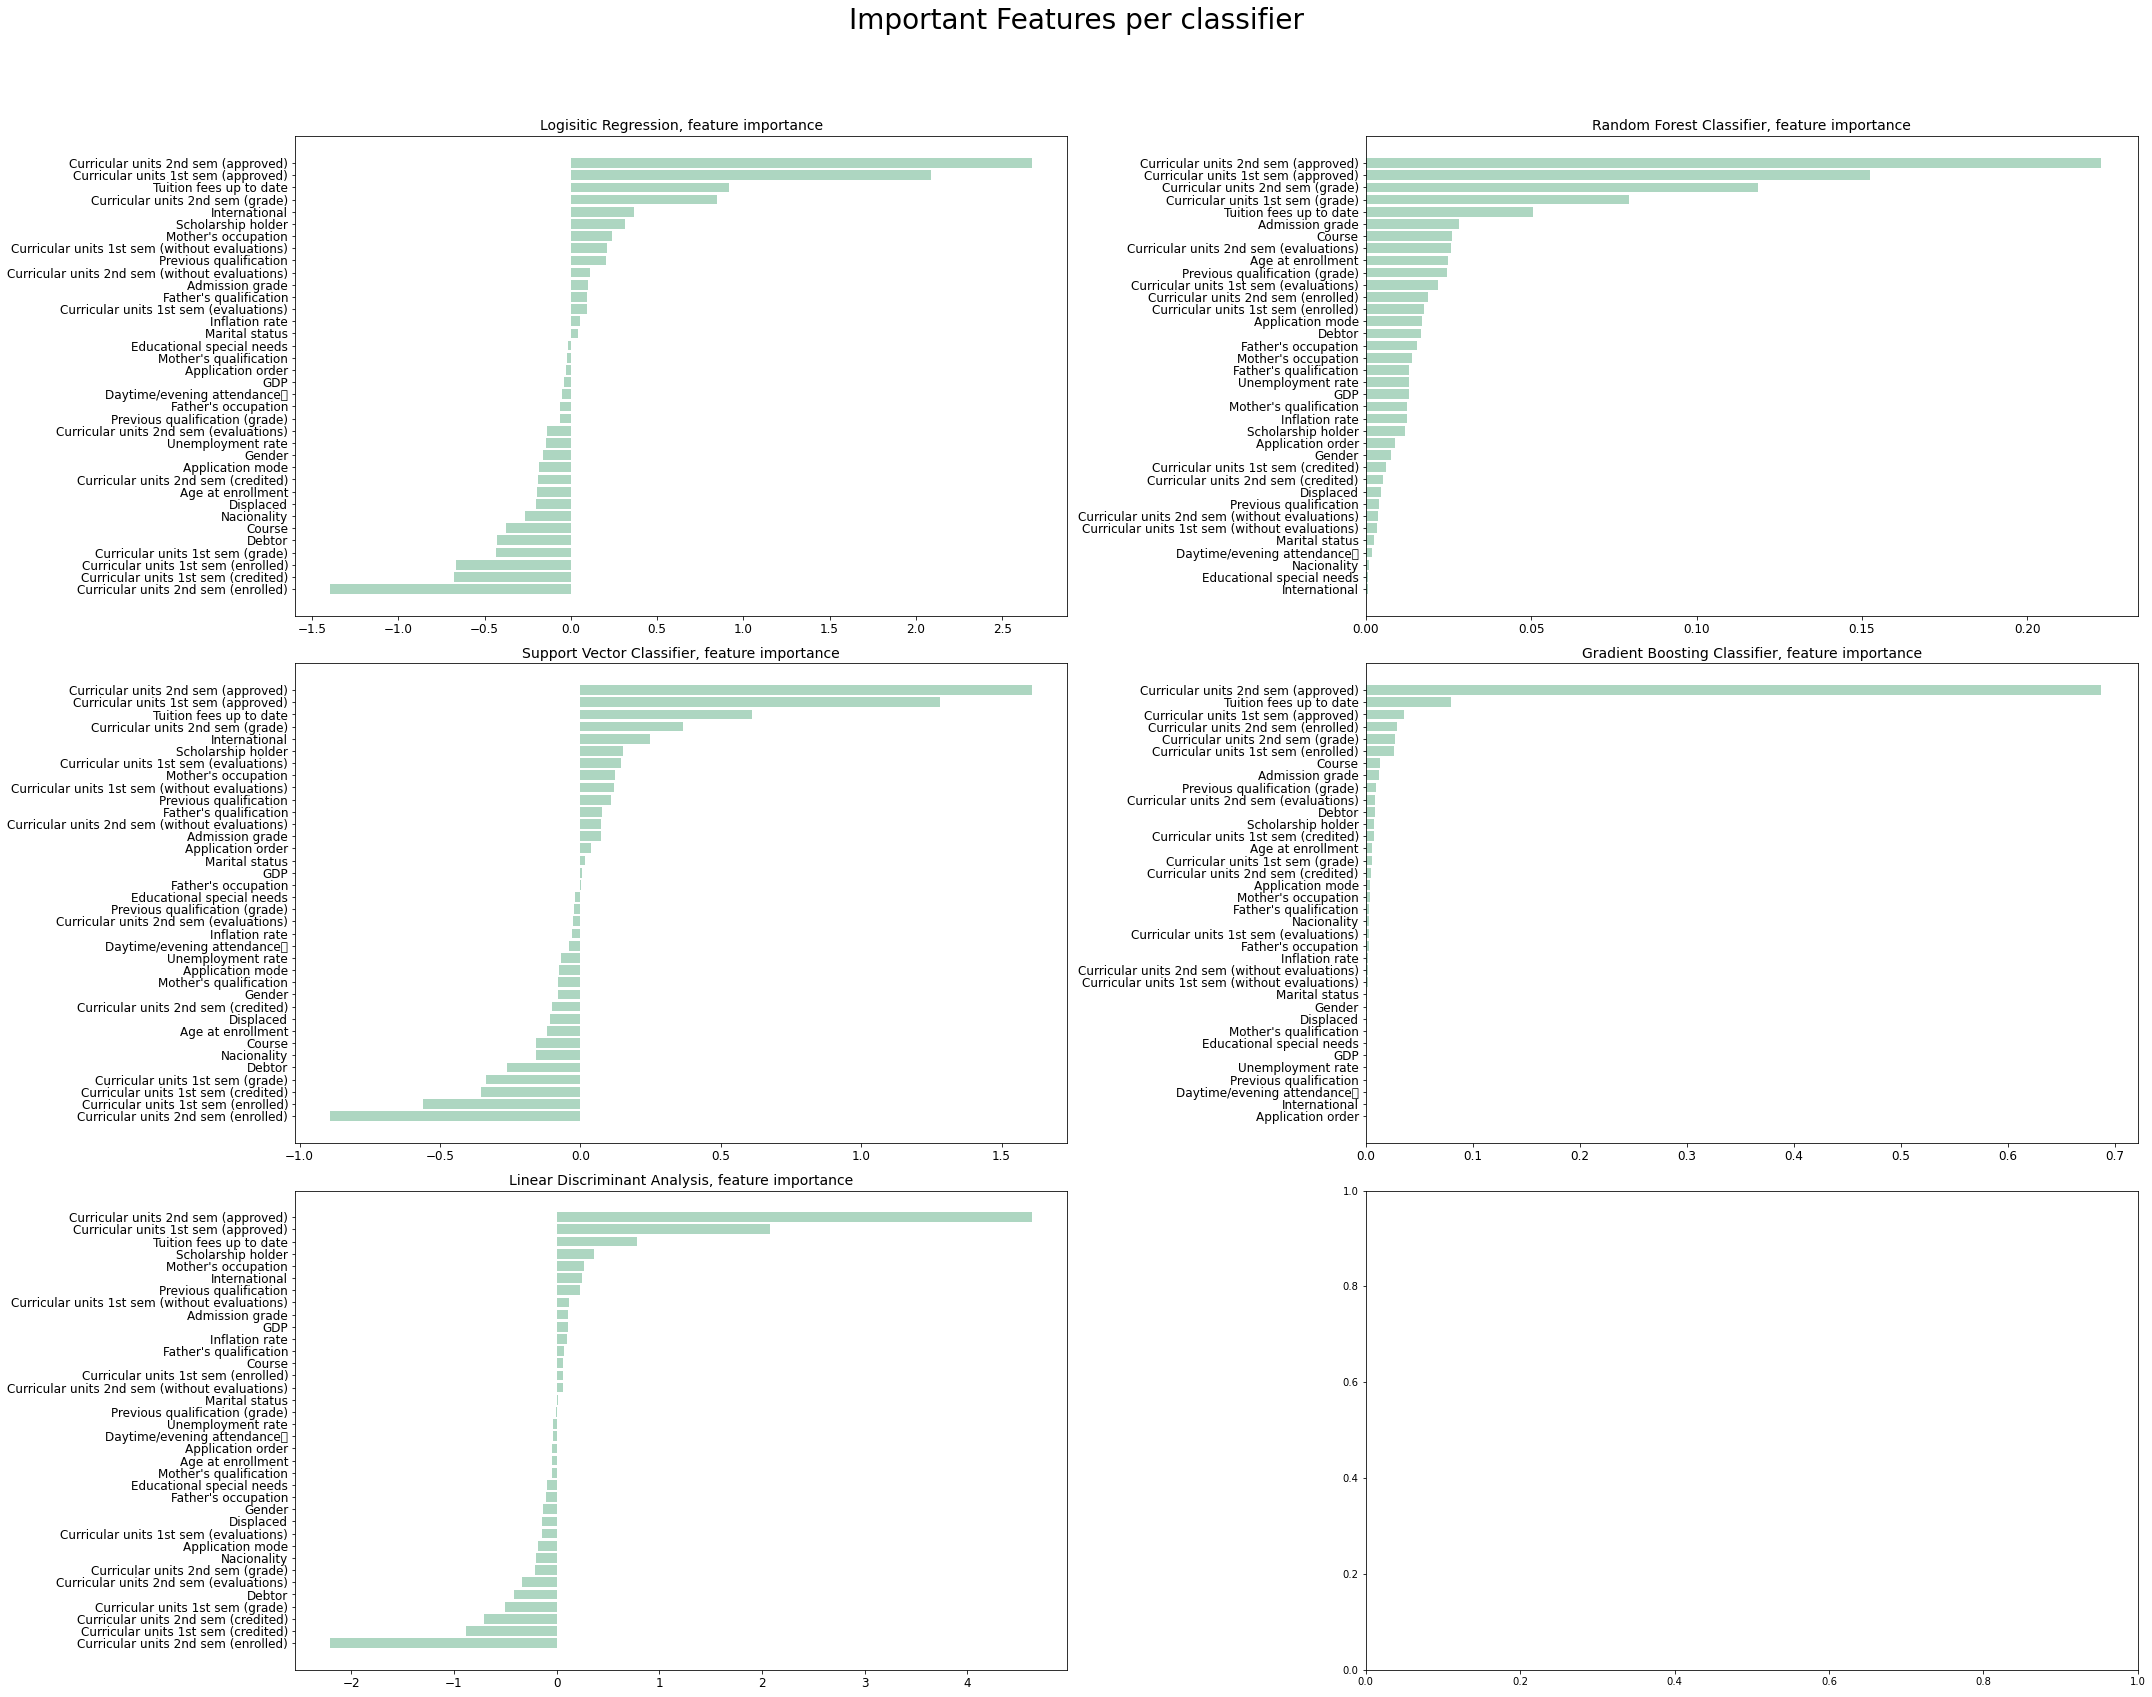

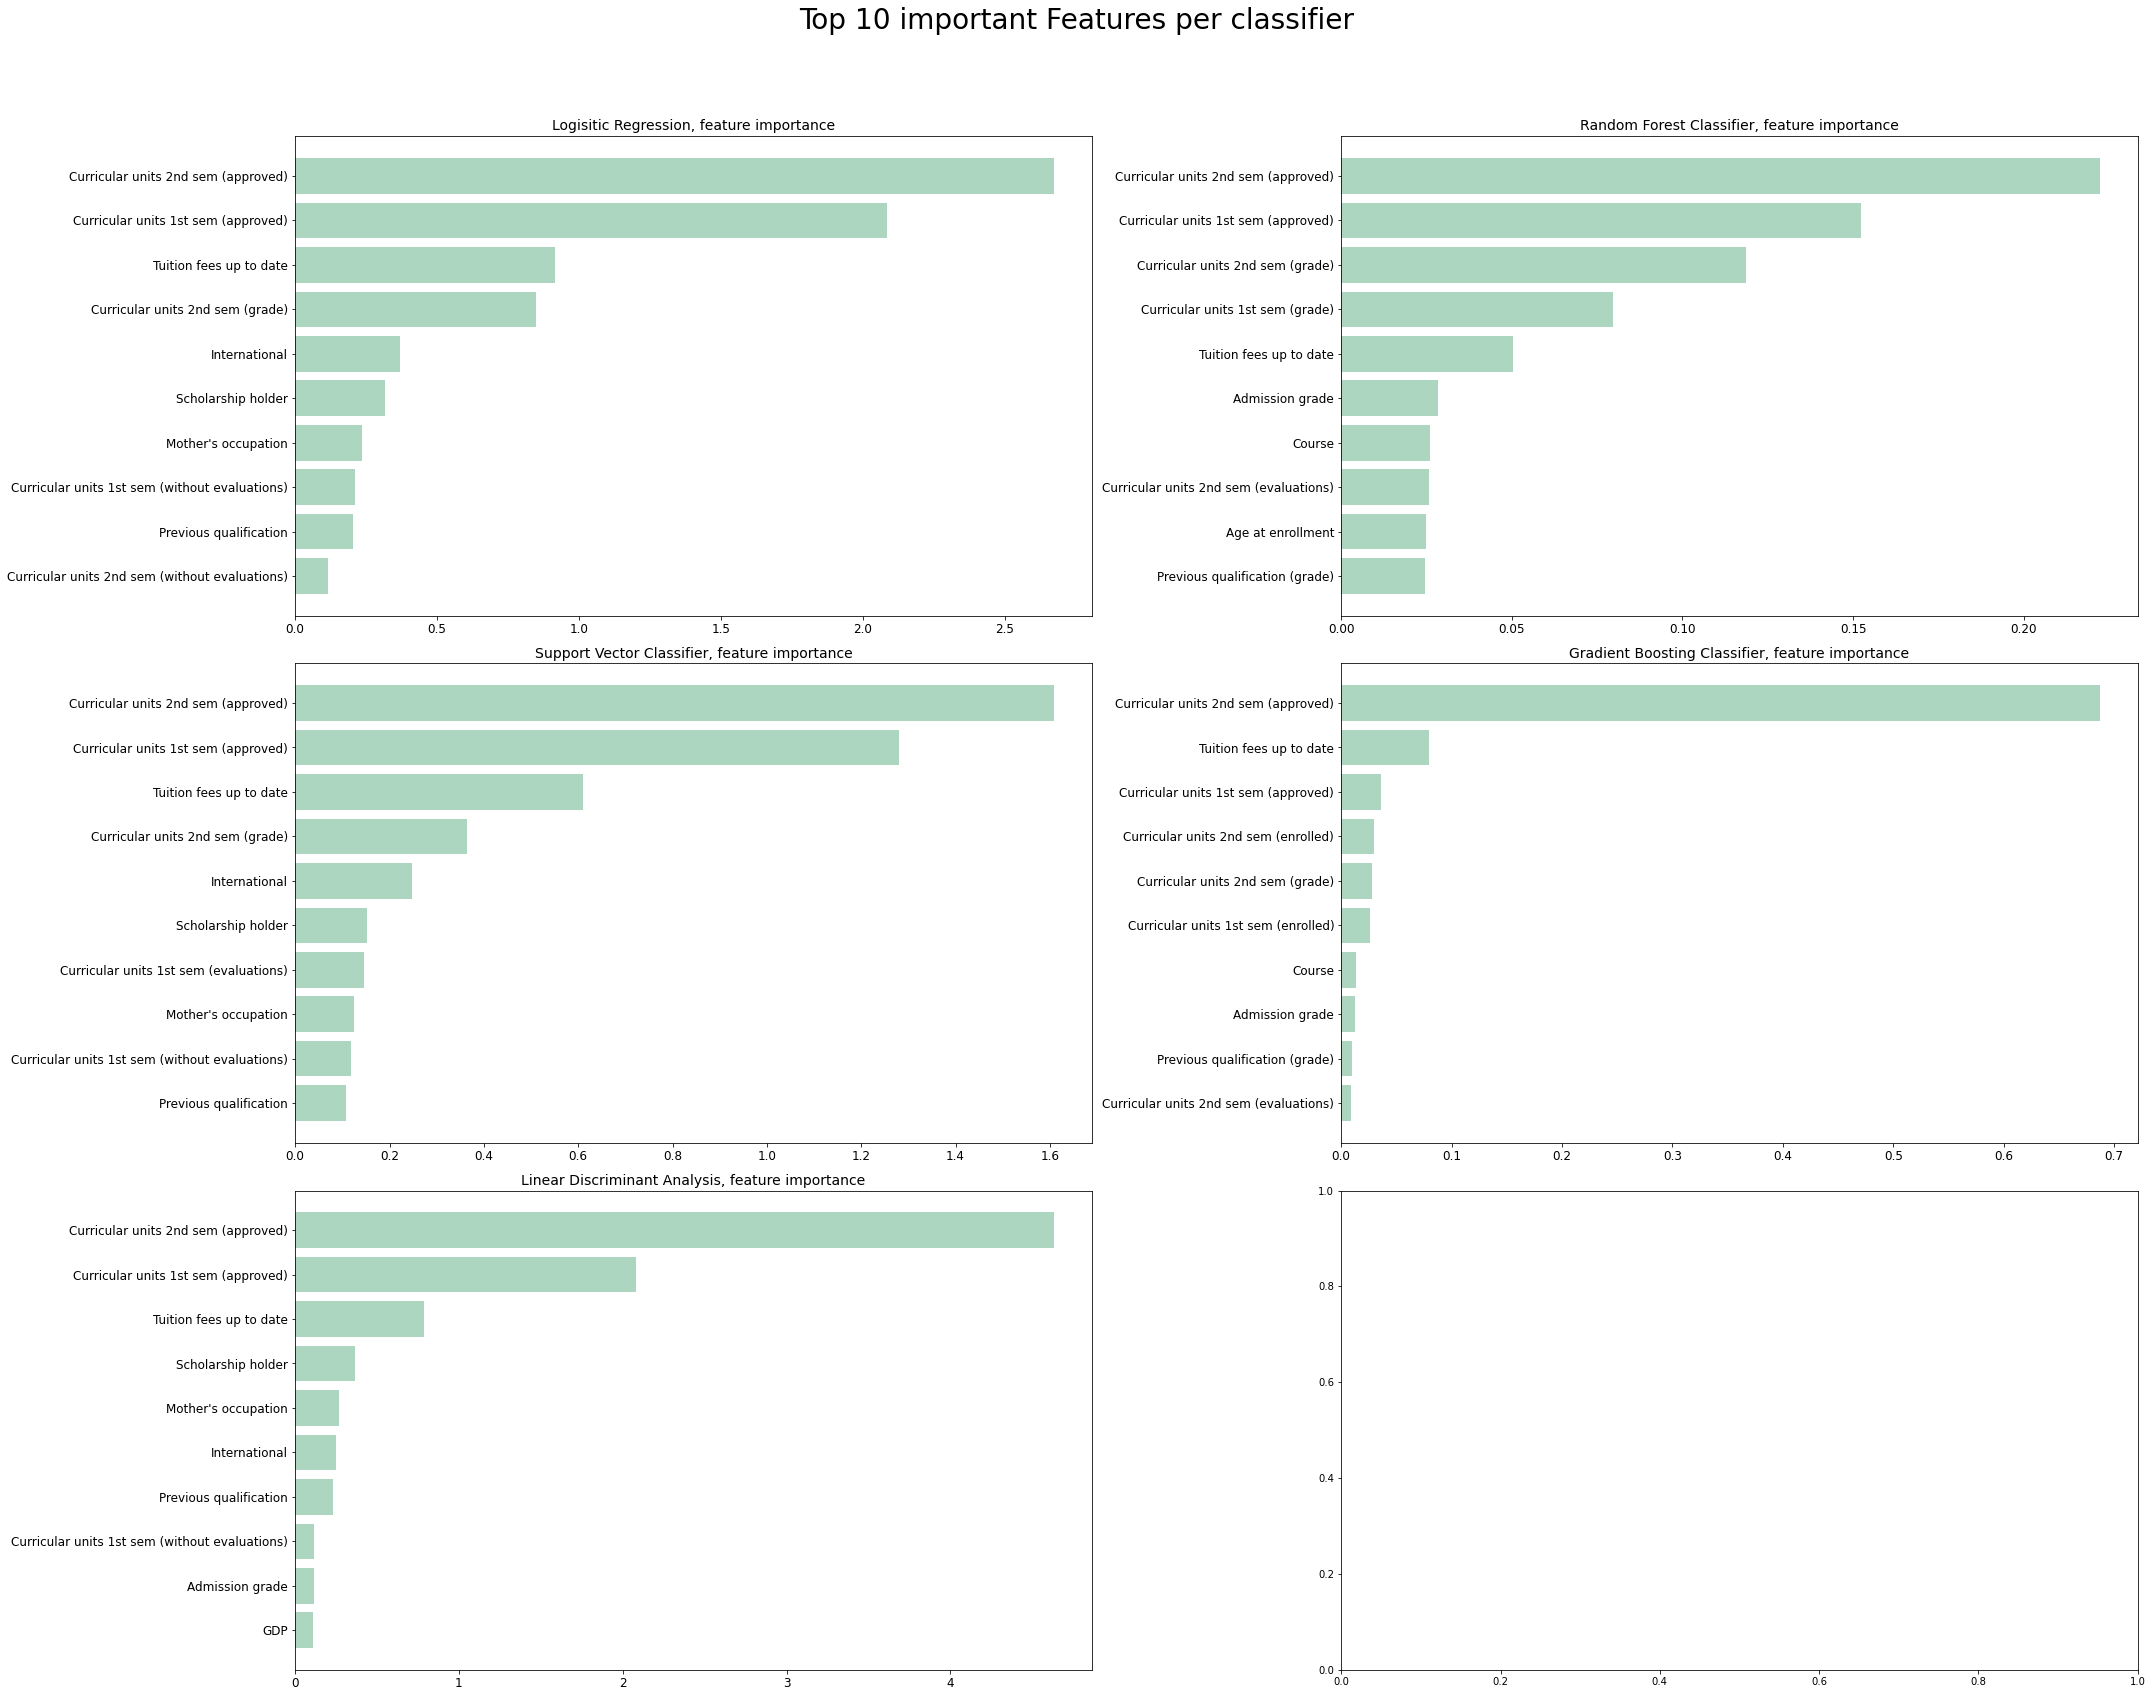

In [83]:

models_important_features(X_train, X_train_scaled, y_train, clf_dict, width=30, titlesize=14, labelsize=12, limit=10)
# models_important_features(X_train, X_train_scaled, y_train, clf, limit=10)

In [84]:
# # Looking at the most important features for the models
# lr = LogisticRegression()
# lr.fit(X_train_scaled, y_train)
# imp_lr = (pd.DataFrame(data={'attr': X_train.columns,'im_lr': lr.coef_[0]})).sort_values(by='im_lr')

# rf = RandomForestClassifier()
# rf.fit(X_train_scaled, y_train)
# imp_rf = (pd.DataFrame(data={'attr': X_train.columns, 'im_rf': rf.feature_importances_}).sort_values(by='im_rf'))

# svc = SVC(kernel="linear")
# svc.fit(X_train_scaled, y_train)
# imp_svc = (pd.DataFrame(data={'attr': X_train.columns, 'im_svc': svc.coef_[0]})).sort_values(by='im_svc')

# gbc = GradientBoostingClassifier()
# gbc.fit(X_train_scaled, y_train)
# imp_gbc = (pd.DataFrame(data={'attr': X_train.columns, 'im_gbc': gbc.feature_importances_})).sort_values(by='im_gbc')

# fig, ax = plt.subplots(2, 2, figsize=(10,9)) 

# ax[0, 0].barh(imp_lr['attr'], imp_lr['im_lr'], align='center', color=(0.2, 0.6, 0.4, 0.4))
# ax[0, 0].set_title('Logistic Regression, feature importance', size=9)
# ax[0, 0].tick_params(axis='both', which='major', labelsize=7)

# ax[0, 1].barh(imp_rf['attr'], imp_rf['im_rf'], align='center', color=(0.2, 0.6, 0.4, 0.4))
# ax[0, 1].set_title('Random Forest, feature importance', size=9)
# ax[0, 1].tick_params(axis='both', which='major', labelsize=7)

# ax[1, 0].barh(imp_svc['attr'], imp_svc['im_svc'], align='center', color=(0.2, 0.6, 0.4, 0.4))
# ax[1, 0].set_title('SVC, feature importance', size=9)
# ax[1, 0].tick_params(axis='both', which='major', labelsize=7)

# ax[1, 1].barh(imp_gbc['attr'], imp_gbc['im_gbc'], align='center', color=(0.2, 0.6, 0.4, 0.4))
# ax[1, 1].set_title('Gradient Boosting, feature importance', size=9)
# ax[1, 1].tick_params(axis='both', which='major', labelsize=7)

# fig.tight_layout()
# plt.show()

some text...

### 5. PROJECT CONCLUSIONS

lite text...

några grafer och tabeller kanske???

In [85]:


# OBS Ska läggas in i koden
# Run the final model on the part of the dataset that has Target 'Enrolled'

# Creating dataset with ONLY 'Enrolled'
df3 = df.copy(deep=True)
df3 = df3[df3.Target == 'Enrolled']
print(np.unique(df3['Target'], return_counts=True))
print()
print(df3.shape)

# Creating X_enr, dataset without Target + scaling
X_enr = df3.drop(['Target'], axis=1)
X_enr_scaled = StandardScaler().fit_transform(X_enr.astype(np.float64))



(array(['Enrolled'], dtype=object), array([794], dtype=int64))

(794, 37)


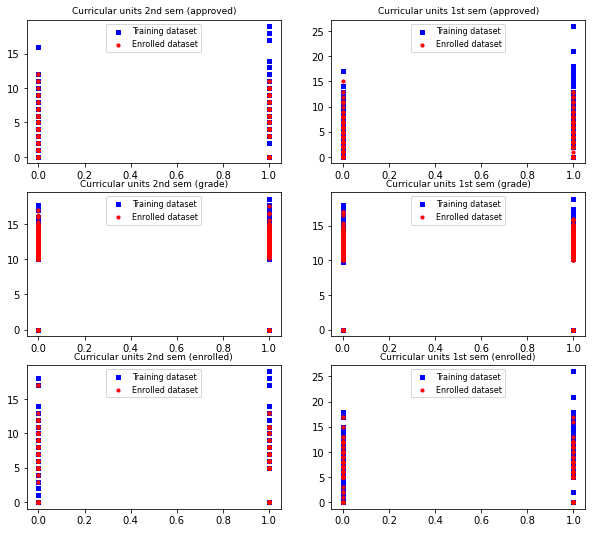

In [86]:
# WORK IN PROGRESS
# Göra lite grafer över nedanstående features, jämföra skillnader i värden mellan res_train och res_enrolled

yt = ensemb_final.predict(X_train_scaled)
ye = ensemb_final.predict(X_enr_scaled)

xt_2sem_app = X_train['Curricular units 2nd sem (approved)']
xt_1sem_app = X_train['Curricular units 1st sem (approved)']
xt_2sem_gra = X_train['Curricular units 2nd sem (grade)']
xt_1sem_gra = X_train['Curricular units 1st sem (grade)']
#xt_tui_fees = X_train['Tuition fees up to date']
xt_2sem_enr = X_train['Curricular units 2nd sem (enrolled)']
xt_1sem_enr = X_train['Curricular units 1st sem (enrolled)']

xe_2sem_app = X_enr['Curricular units 2nd sem (approved)']
xe_1sem_app = X_enr['Curricular units 1st sem (approved)']
xe_2sem_gra = X_enr['Curricular units 2nd sem (grade)']
xe_1sem_gra = X_enr['Curricular units 1st sem (grade)']
#xe_tui_fees = X_enr['Tuition fees up to date']
xe_2sem_enr = X_enr['Curricular units 2nd sem (enrolled)']
xe_1sem_enr = X_enr['Curricular units 1st sem (enrolled)']

fig, ax = plt.subplots(3, 2, figsize=(10,9))

ax[0, 0].scatter(yt, xt_2sem_app, s=10, c='b', marker="s", label='Training dataset')
ax[0, 0].scatter(ye, xe_2sem_app, s=10, c='r', marker="o", label='Enrolled dataset')
ax[0, 0].set_title('Curricular units 2nd sem (approved)', size=9)
ax[0, 0].legend(loc='upper center', fontsize=8)

ax[0, 1].scatter(yt, xt_1sem_app, s=10, c='b', marker="s", label='Training dataset')
ax[0, 1].scatter(ye, xe_1sem_app, s=10, c='r', marker="o", label='Enrolled dataset')
ax[0, 1].set_title('Curricular units 1st sem (approved)', size=9)
ax[0, 1].legend(loc='upper center', fontsize=8)

ax[1, 0].scatter(yt, xt_2sem_gra, s=10, c='b', marker="s", label='Training dataset')
ax[1, 0].scatter(ye, xe_2sem_gra, s=10, c='r', marker="o", label='Enrolled dataset')
ax[1, 0].set_title('Curricular units 2nd sem (grade)', size=9)
ax[1, 0].legend(loc='upper center', fontsize=8)

ax[1, 1].scatter(yt, xt_1sem_gra, s=10, c='b', marker="s", label='Training dataset')
ax[1, 1].scatter(ye, xe_1sem_gra, s=10, c='r', marker="o", label='Enrolled dataset')
ax[1, 1].set_title('Curricular units 1st sem (grade)', size=9)
ax[1, 1].legend(loc='upper center', fontsize=8)

ax[2, 0].scatter(yt, xt_2sem_enr, s=10, c='b', marker="s", label='Training dataset')
ax[2, 0].scatter(ye, xe_2sem_enr, s=10, c='r', marker="o", label='Enrolled dataset')
ax[2, 0].set_title('Curricular units 2nd sem (enrolled)', size=9)
ax[2, 0].legend(loc='upper center', fontsize=8)

ax[2, 1].scatter(yt, xt_1sem_enr, s=10, c='b', marker="s", label='Training dataset')
ax[2, 1].scatter(ye, xe_1sem_enr, s=10, c='r', marker="o", label='Enrolled dataset')
ax[2, 1].set_title('Curricular units 1st sem (enrolled)', size=9)
ax[2, 1].legend(loc='upper center', fontsize=8)

plt.show()

In [87]:

count = Counter(ye)
print(count)
total_count = sum(count.values())

percentages = {}
for label, count in count.items():
    percentages['Graduate' if label == 1 else 'Dropout'] = str(round((count / total_count) * 100, 2)) + '%'

print(percentages)

Counter({1: 414, 0: 380})
{'Dropout': '47.86%', 'Graduate': '52.14%'}


In [88]:
stat_sum_tra = xt_2sem_app.agg(['median', 'mean', 'min', 'max', 'std'])
stat_sum_enr = xe_2sem_app.agg(['median', 'mean', 'min', 'max', 'std'])
display(stat_sum_tra)
display(stat_sum_enr)

median     5.000000
mean       4.481700
min        0.000000
max       19.000000
std        3.122083
Name: Curricular units 2nd sem (approved), dtype: float64

median     4.000000
mean       4.057935
min        0.000000
max       12.000000
std        2.180197
Name: Curricular units 2nd sem (approved), dtype: float64

In [89]:
from IPython.display import display_html

stat_sum = X_train.agg(['median', 'min', 'max', 'std'])
stat_sum_sc = X_enr.agg(['median', 'min', 'max', 'std'])
df1stat = stat_sum.transpose()
df2stat = stat_sum_sc.transpose()

df1styler = df1stat.style.set_table_attributes("style='display:inline'").set_caption('Statistics X_train')
df2styler = df2stat.style.hide(axis='index').set_table_attributes("style='display:inline'").set_caption('Statistics X_enrolled')
display_html(df1styler._repr_html_() + df2styler._repr_html_(), raw=True)

,median,min,max,std
Marital status,1.000000,1.000000,6.000000,0.597741
Application mode,17.000000,1.000000,53.000000,17.291884
Application order,1.000000,0.000000,6.000000,1.353985
Course,9238.000000,33.000000,9991.000000,2054.702272
Daytime/evening attendance,1.000000,0.000000,1.000000,0.315626
Previous qualification,1.000000,1.000000,43.000000,9.842087
Previous qualification (grade),133.100000,95.000000,188.000000,13.313171
Nacionality,1.000000,1.000000,105.000000,6.988713
Mother's qualification,19.000000,1.000000,44.000000,15.604421
Father's qualification,19.000000,1.000000,44.000000,15.258623
